<a href="https://colab.research.google.com/github/Weinihsiang/Music-Genre-Classification/blob/main/APS360%2C_Team_11%2C_MusicGenreClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING MODEL FOR MUSIC GENRE CLASSIFICATION USING CNN AND RNN IN PYTORCH

**University of Toronto: APS360 Project Progress Report – Group 11**

BY

- Victor Deng

- Coline Zhang

- Ashley Leal

- Winnie Hsiang

This project aims to successfully implement a CNN-RNN hybrid model for music genre classification. With the ever-expanding volume of music content available on the internet, the demand
for efficient and automated music classification systems becomes increasingly vital. Deep learning, especially when leveraging PyTorch, offers an ideal approach for this task, as it can learn from
pre-classified music and extract crucial information for accurately classifying newly created tracks.
The core goals of the project are outlined as follows:
1. Collect and preprocess a large dataset of diverse music tracks, including a wide range of
genres and sub-genres.
2. Design and implement a CNN-RNN hybrid model architecture using PyTorch, taking advantage of the strengths of both convolutional neural networks (CNNs) and recurrent neural
networks (RNNs) for music classification.
3. Achieve prediction accuracy over 70% on new music tracks.
The propsed deep learning model takes a grayscale image of an MFCC spectrogram as a numpy 2D
array as input and outputs a predicted classification for the input music track.

#0. Library importation and Helper Functions



In [ ]:
#library importation
import csv
import numpy as np
import random
import torch
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import time
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
from torchvision.utils import make_grid
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import shutil
from torchvision.datasets import ImageFolder
import ast
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import librosa


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Helper Function
def genre_distribution(df):
  for label in df['label']:
      #dictionary of counts
      counts = df['label'].value_counts().to_dict()
  print(counts)

def convert2NumpyArray(mfccs):
    row_num = -1
    for ch in mfccs:
        if ch == '[':
            row_num += 1
    cleaned_input = mfccs.replace("[", "").replace("]", "").replace("\n", "")
    elements = cleaned_input.split()
    column_num = len(elements) // row_num
    numeric_array = np.array(elements, dtype=np.float64)
    numeric_array = numeric_array.astype(np.float32)
    desired_shape = (row_num, column_num)
    reshaped_array = numeric_array.reshape(desired_shape)
    return reshaped_array

#1. Data Processing


In [ ]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR')

# Load metadata and features.

tracks = utils.load('D:/fma-master/fma_metadata/fma_metadata/tracks.csv')


np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape , features.shape, echonest.shape

In [ ]:
def format_label(label):

    if type(label) == str:

        #remove special characters
        label = ''.join(e for e in label if e.isalnum())
        #all lower case
        label = label.lower()

        if 'blues' in label:
            return 'blues'

        elif 'classical' in label or 'chamber' in label or 'symphon' in label:
            return 'classical'

        elif 'country' in label or 'folk' in label:
            return 'country'

        elif 'disco' in label:
            return 'disco'

        elif 'hiphop' in label or 'rap' in label:
            return 'hiphop'

        elif 'jazz' in label:
            return 'jazz'

        elif 'metal' in label:
            return 'metal'

        elif 'pop' in label:
            return 'pop'

        elif 'reggae' in label:
            return 'reggae'

        elif 'rock' in label:
            return 'rock'

    else:
        return None

In [ ]:
tracks = tracks['track']
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
n = 0
error = 0
data = []

for id, row in tracks.iterrows():
    label = row['genre_top']
    label = format_label(label)

    if label in genres:
        n += 1
        try:

            root = 'D:/fma-master/fma_medium'
            track_id = '{:06d}'.format(id)
            path = root+ '/fma_medium/'+track_id[:3] +'/'+(track_id + '.mp3')
            x, sampling_rate = librosa.load(path)
            mfcc = librosa.feature.mfcc(y=x, sr=sampling_rate)
            mfcc = np.array(mfcc)
            mfcc = np.array2string(mfcc,threshold=np.inf)

            sample = {'mfcc': mfcc,'label': label}
            data.appenzd(sample)

        except Exception as e:
            print(e)
            error += 1

        if n % 100 == 0:
            print(f"Processed {n} tracks")





In [ ]:
df = pd.DataFrame(data)
df.to_csv('mfcc_fma.csv', index=False)

In [ ]:
def convert2NumpyArray(mfccs):
    row_num = -1
    for ch in mfccs:
        if ch == '[':
            row_num += 1
    # Remove unnecessary characters
    cleaned_input = mfccs.replace("[", "").replace("]", "").replace("\n", "")

    # Split the string into individual elements
    elements = cleaned_input.split()

    # Calculate the number of columns and rows
    column_num = len(elements) // row_num

    # Reshape the array to the desired shape
    numeric_array = np.array(elements, dtype=np.float64)
    numeric_array = numeric_array.astype(np.float32)  # Cast to float32
    desired_shape = (row_num, column_num)
    reshaped_array = numeric_array.reshape(desired_shape + (1,))
    return reshaped_array


In [ ]:
#plot the counts
counts['rock'] += 100
counts['pop'] += 100
counts['metal'] += 100
counts['jazz'] += 100
counts['hiphop'] += 100
counts['disco'] += 100
counts['country'] += 0
counts['classical'] += 100
counts['blues'] += 100
counts['reggae'] += 100


plt.figure(figsize=(10,5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Number of songs per genre")
plt.ylabel('Number of songs')
plt.xlabel('Genre')

#sum of all songs
total = sum(counts.values())
print(total)


plt.show()



#2. Data Loading


In [ ]:
pathTrain = "/content/drive/MyDrive/APS360Data/train_New10000.csv"
pathValid = "/content/drive/MyDrive/APS360Data/valid_New1000.csv"
pathTest = "/content/drive/MyDrive/APS360Data/test_New.csv"

train_df = pd.read_csv(pathTrain)
valid_df = pd.read_csv(pathValid)
test_df = pd.read_csv(pathTest)

In [ ]:
print(genre_distribution(train_df))
print(genre_distribution(valid_df))
print(genre_distribution(test_df))

In [ ]:
output_shape = (20, 200)

# Create the transform
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((20, 200)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
class MFCCDataset(Dataset):
    def __init__(self, df, transform = None):
        self.df = df
        self.mfccs = self.df.iloc[:, 0]
        self.categories = encoding(self.df.iloc[:, 1])
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        mfcc = convert2NumpyArray(self.mfccs[idx])
        category = self.categories[idx]
        if self.transform is not None:
            mfcc = self.transform(mfcc)

        return mfcc, category

genre_list = ["rock","hiphop","classical","jazz","country","pop","metal","disco","reggae","blues"]

def encoding(categories,genres = genre_list):
  update_category = []
  for i in range(len(categories)):
    if categories[i] in genres:
      update_category.append(genres.index(categories[i]))
    else:
      print("error")
  return update_category

In [ ]:
train_dataset = MFCCDataset(train_df, transform=transform)
valid_dataset = MFCCDataset(valid_df, transform=transform)
test_dataset = MFCCDataset(test_df, transform=transform)
print("Length of train_dataset: ", len(train_dataset))
print("Length of valid_dataset: ", len(valid_dataset))
print("Length of test_dataset: ", len(test_dataset))


Length of train_dataset:  100000
Length of valid_dataset:  10000
Length of test_dataset:  2143


In [ ]:
batch_size = 200

train_loader = data.DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True, pin_memory=True)
val_loader = data.DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True, pin_memory=True)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=False, pin_memory=True)

In [ ]:
print("Batches of train_loader: "+ str(len(train_loader))+" |Length of train_loader: "+ str(len(train_loader)*batch_size))
print("Batches of val_loader: "+ str(len(val_loader)) +"|Length of val_loader: "+ str(len(val_loader)*batch_size))
print("Batchesh of test_loader: "+ str(len(test_loader))+" |Length of test_loader: "+ str(len(test_loader)*batch_size))

Batches of train_loader: 500 |Length of train_loader: 100000
Batches of val_loader: 50|Length of val_loader: 10000
Batchesh of test_loader: 11 |Length of test_loader: 2200


#3. Building Models and Training Functions

##3.1 Baseline Model

In [ ]:
import torch
from torch import nn

class Baseline_Model(nn.Module):
    def __init__(self):
        super(Baseline_Model, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(20*200, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten the input
        x = self.net(x)
        return x



##3.2 Primary Model

In [ ]:
class CNN_RNN_Hybrid(nn.Module):
    def __init__(self):
        super(CNN_RNN_Hybrid, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(32, 64, kernel_size=(5,5), stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(64, 128, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(128, 256, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
        )

        self.cnn_output_size = 3072

        self.rnn = nn.GRU(input_size=self.cnn_output_size, hidden_size=512, num_layers=1, batch_first=True, bidirectional=True)

        self.fc = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, X):
        batch_size, _, _, _ = X.size()
        X = self.cnn(X)
        X = X.view(batch_size, -1, self.cnn_output_size)
        _, X = self.rnn(X)
        X = torch.cat((X[-2,:,:], X[-1,:,:]), dim=1)
        X = self.fc(X)

        return X


In [ ]:
model = CNN_RNN_Hybrid().cuda()
print(model)

CNN_RNN_Hybrid(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): GRU(3072, 512, batch_first=True, bidirectional=True)
  (fc): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, ou

##3.3 Training Code and Helper Functions

In [ ]:
#Winnie

#helper function get_model_name, get_accuracy, get_loss

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values
    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

#########################################################################

def get_accuracy(model, train=False, test= False):
    if train:
        data = train_loader
    elif test:
        data = test_loader
    else:
      data = val_loader
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():  # No need to compute gradients during evaluation
        batch_count = 0
        for spectrums, labels in data:
            if use_cuda and torch.cuda.is_available():
                spectrums = spectrums.cuda()
                labels = labels.cuda()

            output = model(spectrums)
            pred = output.max(1, keepdim=True)[1]  # get the index of the max logit
            correct += pred.eq(labels.view_as(pred)).sum().item()
            total += spectrums.size(0)
            batch_count += 1

    return correct / total

def get_accuracy_per_genre(model, data_loader, genre_list):
    model.eval()
    correct_pred = {genre: 0 for genre in genre_list}
    total_pred = {genre: 0 for genre in genre_list}

    with torch.no_grad():
        for spectrums, labels in data_loader:
            if use_cuda and torch.cuda.is_available():
                spectrums = spectrums.cuda()
                labels = labels.cuda()

            output = model(spectrums)
            _, predictions = torch.max(output, 1)

            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[genre_list[label]] += 1
                total_pred[genre_list[label]] += 1

    for genre in genre_list:
        print(f"Accuracy for genre {genre}: {correct_pred[genre] / total_pred[genre] * 100}")



def get_loss(model, data_loader, criterion):
  total_loss = 0
  i = 0
  with torch.no_grad():
    for data, labels in data_loader:
      if use_cuda and torch.cuda.is_available():
            data = data.cuda()
            labels = labels.cuda()
      data = torch.tensor(data)
      out = model(data)
      loss = criterion(out, labels)
      total_loss += loss.item()
      i += 1

  return total_loss/(i + 1)

In [ ]:

learning_rate = 0.001
momentum = 0.9
weight_decay = 0.0001
def train(model, train_loader, valid_loader, batch_size, num_epochs, learning_rate=learning_rate, weight_decay=weight_decay):
    """ Training loop. You should update this."""
    torch.manual_seed(42)
    print("run1")
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),weight_decay=weight_decay,lr=learning_rate)
    print("run2")
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    val_genres_acc = np.zeros((num_epochs,10))
    train_acc = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)

    start_time = time.time()

    device = torch.device("cuda")
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        n = 0 # the number of iterations
        for data, labels in train_loader:
            #############################################
            # To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              data = data.cuda()
              labels = labels.cuda()
            #############################################
            #print("data: ", data.device)
            out = model(data)             # forward pass
            #print("outs(this should be 16x10): ", out.shape)
            #print("Labels: " , labels)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            # Save the current training information

            total_loss += loss.item()
            n += 1

        if epoch %2 == 0:
            get_accuracy_per_genre(model, val_loader, genre_list)
        train_acc[epoch] = get_accuracy(model, train=True)
        val_acc[epoch]= get_accuracy(model)
        train_loss[epoch] = total_loss/(n + 1)
        val_loss[epoch] = get_loss(model, valid_loader, criterion)


        print(("Epoch {}: Train acc: {} |"+"Validation acc: {}").format(
                epoch+1,
                train_acc[epoch],
                val_acc[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.4f} seconds".format(elapsed_time))


    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_loss, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_loss, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_acc, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

    return train_acc, val_acc, train_loss, val_loss, num_epochs

#4. Training

##4.1 Baseline Model Training

model
run1
run2
Accuracy for genre rock: 24.099999999999998
Accuracy for genre hiphop: 63.7
Accuracy for genre classical: 44.0
Accuracy for genre jazz: 36.9
Accuracy for genre country: 57.099999999999994
Accuracy for genre pop: 80.7
Accuracy for genre metal: 47.199999999999996
Accuracy for genre disco: 40.9
Accuracy for genre reggae: 41.699999999999996
Accuracy for genre blues: 13.4
Epoch 1: Train acc: 0.59658 |Validation acc: 0.4497
Epoch 2: Train acc: 0.64663 |Validation acc: 0.4726
Accuracy for genre rock: 27.6
Accuracy for genre hiphop: 54.2
Accuracy for genre classical: 52.0
Accuracy for genre jazz: 48.6
Accuracy for genre country: 47.599999999999994
Accuracy for genre pop: 77.4
Accuracy for genre metal: 61.1
Accuracy for genre disco: 49.4
Accuracy for genre reggae: 33.4
Accuracy for genre blues: 30.2
Epoch 3: Train acc: 0.69524 |Validation acc: 0.4815
Epoch 4: Train acc: 0.67746 |Validation acc: 0.4437
Accuracy for genre rock: 34.0
Accuracy for genre hiphop: 56.599999999999994
Ac

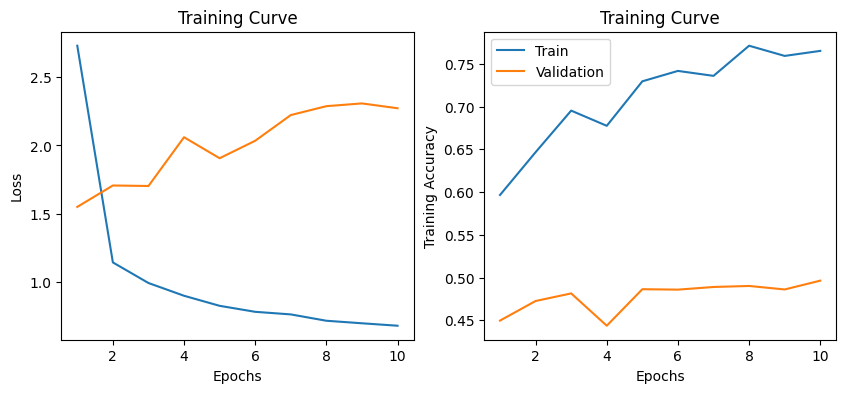

Final Training Accuracy: 0.76508
Final Validation Accuracy: 0.4964


In [ ]:
#
model = Baseline_Model()
use_cuda = True
print("model")
model.name = "first_model"
num_epochs = 10
momentum = 0.09

train_acc, val_acc, train_loss, val_loss, epochs = train(
    model, train_loader, val_loader,
    batch_size=200, num_epochs=num_epochs, learning_rate=0.001,  weight_decay=0.0001
)


In [ ]:
get_accuracy(model,test = True)

0.4815678954736351

In [ ]:
#download the trained model
torch.save(model.state_dict(), 'Baseline-Model.pt')

##4.2 Primary Model Training

###4.2(1) Primary Model 1 Training

In [ ]:
realmodel = CNN_RNN_Hybrid()
realmodel = realmodel.cuda()
use_cuda = True

next(realmodel.parameters()).is_cuda#check if it is on GPU
# From the discussions here: discuss.pytorch.org/t/how-to-check-if-model-is-on-cuda

True

In [ ]:
learning_rate = 0.00001
weight_decay = 0.0001

use_cuda = True
print("realmodel")
realmodel.name = "realmodel"


train_acc, val_acc, train_loss, val_loss, epochs = train(
    realmodel, train_loader, val_loader,
    batch_size=32, num_epochs=10, learning_rate=learning_rate,  weight_decay=weight_decay
)

realmodel


OutOfMemoryError: ignored

In [ ]:
#download the trained model
torch.save(realmodel1.state_dict(), 'First-Model.pt')

###4.2(2) Primary Model 2 Training

realmodel2


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 1: Train acc: 0.24333333333333335 |Validation acc: 0.215


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 2: Train acc: 0.31333333333333335 |Validation acc: 0.245


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 3: Train acc: 0.4483333333333333 |Validation acc: 0.3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 4: Train acc: 0.38166666666666665 |Validation acc: 0.29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: 
can only test a child processException ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 5: Train acc: 0.52 |Validation acc: 0.34


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 6: Train acc: 0.6133333333333333 |Validation acc: 0.32


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 7: Train acc: 0.625 |Validation acc: 0.345


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 8: Train acc: 0.655 |Validation acc: 0.33


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 9: Train acc: 0.6616666666666666 |Validation acc: 0.315


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 10: Train acc: 0.72 |Validation acc: 0.325


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a7827a0c550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 11: Train acc: 0.725 |Validation acc: 0.325
Epoch 12: Train acc: 0.725 |Validation acc: 0.35
Epoch 13: Train acc: 0.725 |Validation acc: 0.335
Epoch 14: Train acc: 0.725 |Validation acc: 0.32
Epoch 15: Train acc: 0.725 |Validation acc: 0.34
Epoch 16: Train acc: 0.725 |Validation acc: 0.33
Epoch 17: Train acc: 0.725 |Validation acc: 0.325
Epoch 18: Train acc: 0.725 |Validation acc: 0.335
Epoch 19: Train acc: 0.725 |Validation acc: 0.315
Epoch 20: Train acc: 0.725 |Validation acc: 0.335
Finished Training
Total time elapsed: 965.3645 seconds


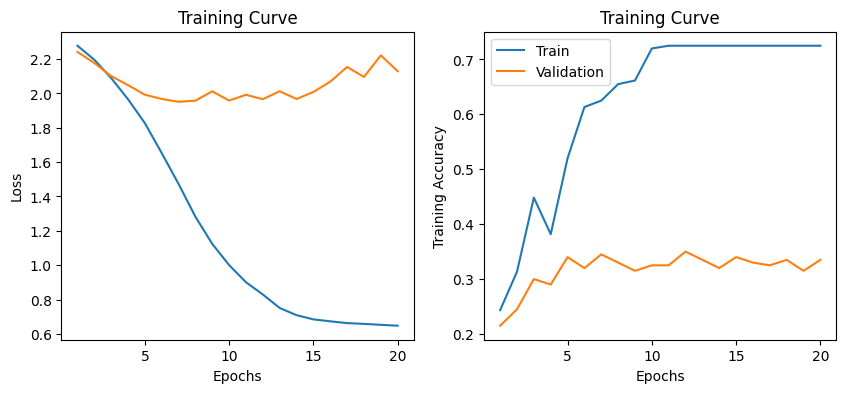

Final Training Accuracy: 0.725
Final Validation Accuracy: 0.335


In [ ]:
realmodel2 = CNN_RNN_Hybrid()
use_cuda = True
print("realmodel2")
realmodel2.name = "realmodel2"


train_acc, val_acc, train_loss, val_loss, epochs = train(
    realmodel2, train_loader, val_loader,
    batch_size=1, num_epochs=20, learning_rate=0.00001, momentum=momentum, weight_decay=weight_decay
)

In [ ]:
#download the trained model
torch.save(realmodel2.state_dict(), 'Second-Model.pt')

###4.2(3) Primary Model 3 Training

realmodel3


<ipython-input-13-6ab03c489f7d>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


Epoch 1: Train acc: 0.11666666666666667 |Validation acc: 0.095
Epoch 2: Train acc: 0.14 |Validation acc: 0.095
Epoch 3: Train acc: 0.21 |Validation acc: 0.165
Epoch 4: Train acc: 0.26166666666666666 |Validation acc: 0.2
Epoch 5: Train acc: 0.2966666666666667 |Validation acc: 0.205
Epoch 6: Train acc: 0.3283333333333333 |Validation acc: 0.2
Epoch 7: Train acc: 0.36 |Validation acc: 0.2
Epoch 8: Train acc: 0.37666666666666665 |Validation acc: 0.205
Epoch 9: Train acc: 0.41 |Validation acc: 0.2
Epoch 10: Train acc: 0.445 |Validation acc: 0.205
Epoch 11: Train acc: 0.45166666666666666 |Validation acc: 0.205
Epoch 12: Train acc: 0.4766666666666667 |Validation acc: 0.19
Epoch 13: Train acc: 0.49166666666666664 |Validation acc: 0.2
Epoch 14: Train acc: 0.49 |Validation acc: 0.22
Epoch 15: Train acc: 0.5033333333333333 |Validation acc: 0.215
Epoch 16: Train acc: 0.49166666666666664 |Validation acc: 0.215
Epoch 17: Train acc: 0.5033333333333333 |Validation acc: 0.21
Epoch 18: Train acc: 0.50666

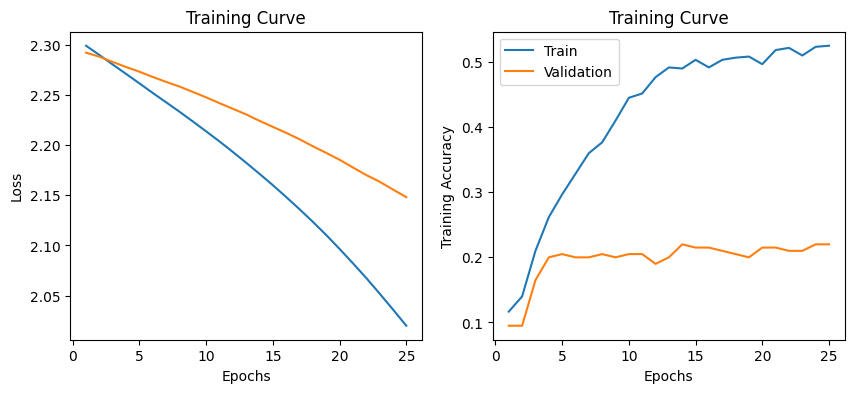

Final Training Accuracy: 0.525
Final Validation Accuracy: 0.22


In [ ]:
realmodel3 = CNN_RNN_Hybrid()
use_cuda = True
print("realmodel3")
realmodel3.name = "realmodel3"


train_acc, val_acc, train_loss, val_loss, epochs = train(
    realmodel3, train_loader, val_loader,
    batch_size=1, num_epochs=20, learning_rate=0.000001, momentum=momentum, weight_decay=weight_decay
)

In [ ]:
#download the trained model
torch.save(realmodel3.state_dict(), 'Third-Model.pt')

###4.2(4) Primary Model 4 Training

realmodel4


<ipython-input-13-6ab03c489f7d>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


Epoch 1: Train acc: 0.20166666666666666 |Validation acc: 0.17
Epoch 2: Train acc: 0.24666666666666667 |Validation acc: 0.235
Epoch 3: Train acc: 0.22 |Validation acc: 0.2
Epoch 4: Train acc: 0.27166666666666667 |Validation acc: 0.255
Epoch 5: Train acc: 0.29833333333333334 |Validation acc: 0.25
Epoch 6: Train acc: 0.35333333333333333 |Validation acc: 0.33
Epoch 7: Train acc: 0.445 |Validation acc: 0.3
Epoch 8: Train acc: 0.5466666666666666 |Validation acc: 0.305
Epoch 9: Train acc: 0.62 |Validation acc: 0.305
Epoch 10: Train acc: 0.675 |Validation acc: 0.32
Epoch 11: Train acc: 0.7333333333333333 |Validation acc: 0.34
Epoch 12: Train acc: 0.8616666666666667 |Validation acc: 0.37
Epoch 13: Train acc: 0.8483333333333334 |Validation acc: 0.37
Epoch 14: Train acc: 0.8683333333333333 |Validation acc: 0.365
Epoch 15: Train acc: 0.8833333333333333 |Validation acc: 0.33
Epoch 16: Train acc: 0.8816666666666667 |Validation acc: 0.335
Epoch 17: Train acc: 0.89 |Validation acc: 0.36
Epoch 18: Trai

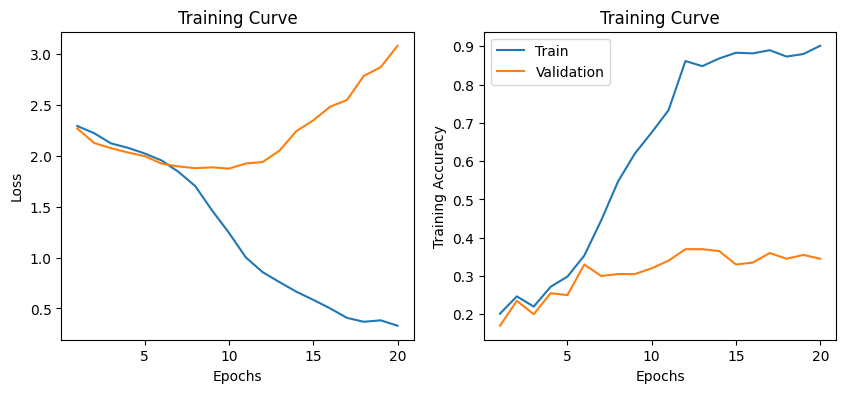

Final Training Accuracy: 0.9016666666666666
Final Validation Accuracy: 0.345


In [ ]:
realmodel4 = CNN_RNN_Hybrid()
use_cuda = True
print("realmodel4")
realmodel4.name = "realmodel4"


train_acc, val_acc, train_loss, val_loss, epochs = train(
    realmodel4, train_loader, val_loader,
    batch_size=1, num_epochs=20, learning_rate=0.00001, momentum=0.9, weight_decay=0.0001
)

In [ ]:
#download the trained model
torch.save(realmodel4.state_dict(), 'Fourth-Model.pt')

#5. Testing


##5.1 Testing Functions

In [ ]:
def truth_table(model, loader):
  '''input dataset of 30 second audio clips, outputs truth table with ground truth on the first dimension'''

  table = np.zeros((10,10))
  total = 0
  correct = 0
  genre_list = ["rock","hiphop","classical","jazz","country","pop","metal","disco","reggae","blues"]

  for spectrums, labels in loader:

        keep_len = 200
        begin = 0

        outputs = model(spectrums[:,:,:,begin:begin+keep_len])
        for i in range(5):
          begin += keep_len
          zeros = torch.zeros_like(outputs)
          input = spectrums[:,:,:,begin:begin+keep_len]
          new_outputs = model(input)

          zeros[:new_outputs.shape[0],:] = new_outputs
          outputs += zeros

        preds = outputs.max(1)[1]
        for i in range(len(labels)):
          table[labels[i].cpu().numpy(), preds[i].cpu().numpy()] += 1

          correct += (labels[i] == preds[i]).int()
          total += 1

  table = table / table.sum(axis=1, keepdims=True)

  table = pd.DataFrame(table, index=genre_list, columns=genre_list)

  return table, correct/total


In [ ]:
def classify(model, loader):
  '''input dataset of 30 second audio clips, outputs truth table with ground truth on the first dimension'''

  table = np.zeros((10,10))
  total = 0
  correct = 0
  genre_list = ["rock","hiphop","classical","jazz","country","pop","metal","disco","reggae","blues"]
  count = -1
  for spectrums, labels in loader:
        count += 1
        keep_len = 200
        begin = 0
        percentage_list = {genre: 0 for genre in genre_list}
        outputs_list = []
        for i in range(spectrums.shape[-1] // keep_len):
          model.eval()
          input = spectrums[:,:,:,begin:begin+keep_len]
          new_outputs = model(input)
          probabilities1 = torch.nn.functional.softmax(new_outputs, dim=1)
          pred1 = probabilities1.max(1)[1]
          pred2 = probabilities1.max(1)[1].item()
          percentage_list[genre_list[pred2]] += 1
          outputs_list.append(new_outputs)
          begin += keep_len

        sorted_keys = sorted(percentage_list, key=lambda x: percentage_list[x], reverse=True)

        output_string = genre_list[labels.item()]+ ": "
        for genre in sorted_keys:
            item = percentage_list[genre]
            if item == 0:
              break
            percentage = item/(spectrums.shape[-1] // keep_len)
            output_string += f"{genre}:{percentage:.2f} "
        print(output_string)

        outputs = torch.stack(outputs_list).mean(dim=0)
        preds = outputs.max(1)[1]
        for i in range(len(labels)):
          table[labels[i].cpu().numpy(), preds[i].cpu().numpy()] += 1

          correct += (labels[i] == preds[i]).int()
          total += 1

  table = table / table.sum(axis=1, keepdims=True)
  table = pd.DataFrame(table, index=genre_list, columns=genre_list)

  return table, correct/total


In [ ]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

## 5.2 Testing on Processed Test Dataset
We'll load a new model object and test it as we had before to make sure it worked.

In [ ]:
realmodel = CNN_RNN_Hybrid()
realmodel.load_state_dict(torch.load('/content/drive/MyDrive/APS360Data/Fourth-Model.pt'))

<All keys matched successfully>

In [ ]:
get_accuracy(realmodel, test = True)

##5.3 Testing on New Datatset

In [ ]:
#Load a MP3 file sample and convert it into a MFCCs array
df = pd.DataFrame()

genre_list = ["rock","hiphop","classical","jazz","country","pop","metal","disco","reggae","blues"]
sr_new = 22050

y, sr = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/jazz/jazz.mp3', sr=sr_new)
resample_ratio = sr_new / sr
y = librosa.resample(y=y, orig_sr = sr, target_sr = sr_new)
duration = len(y) / sr

mfccs = librosa.feature.mfcc(y=y, sr=sr_new, n_mfcc=20)
print(mfccs.shape)
mfccs = np.array2string(mfccs, threshold = np.inf)
new_data = pd.DataFrame({
  'mfcc': [mfccs],
  'label': ['rock']
})

df = df.append(new_data, ignore_index=True)
print(df)

(20, 14585)
                                                mfcc label
0  [[-5.48775635e+02 -5.48775635e+02 -5.48775635e...  rock


In [ ]:
#Load a playlist consist of 10 songs find on Youtube and convert them into a dataframe consist of MFCCs arrays
df = pd.DataFrame()

print(df)
genre_list = ["rock","hiphop","classical","jazz","country","pop","metal","disco","reggae","blues"]
sr_new = 22050

for genre in genre_list:
  y, sr = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/'+genre+'/'+genre+'.mp3', sr=None)
  resample_ratio = sr_new / sr
  y = librosa.resample(y=y, orig_sr = sr, target_sr = sr_new)
  duration = len(y) / sr

  mfccs = librosa.feature.mfcc(y=y, sr=sr_new, n_mfcc=20)
  print(mfccs.shape)
  mfccs = np.array2string(mfccs, threshold = np.inf)
  new_data = pd.DataFrame({
   'mfcc': [mfccs],
   'label': [genre]
  })

  df = df.append(new_data, ignore_index=True)
  print("Final Dataframe:")
  print(df)

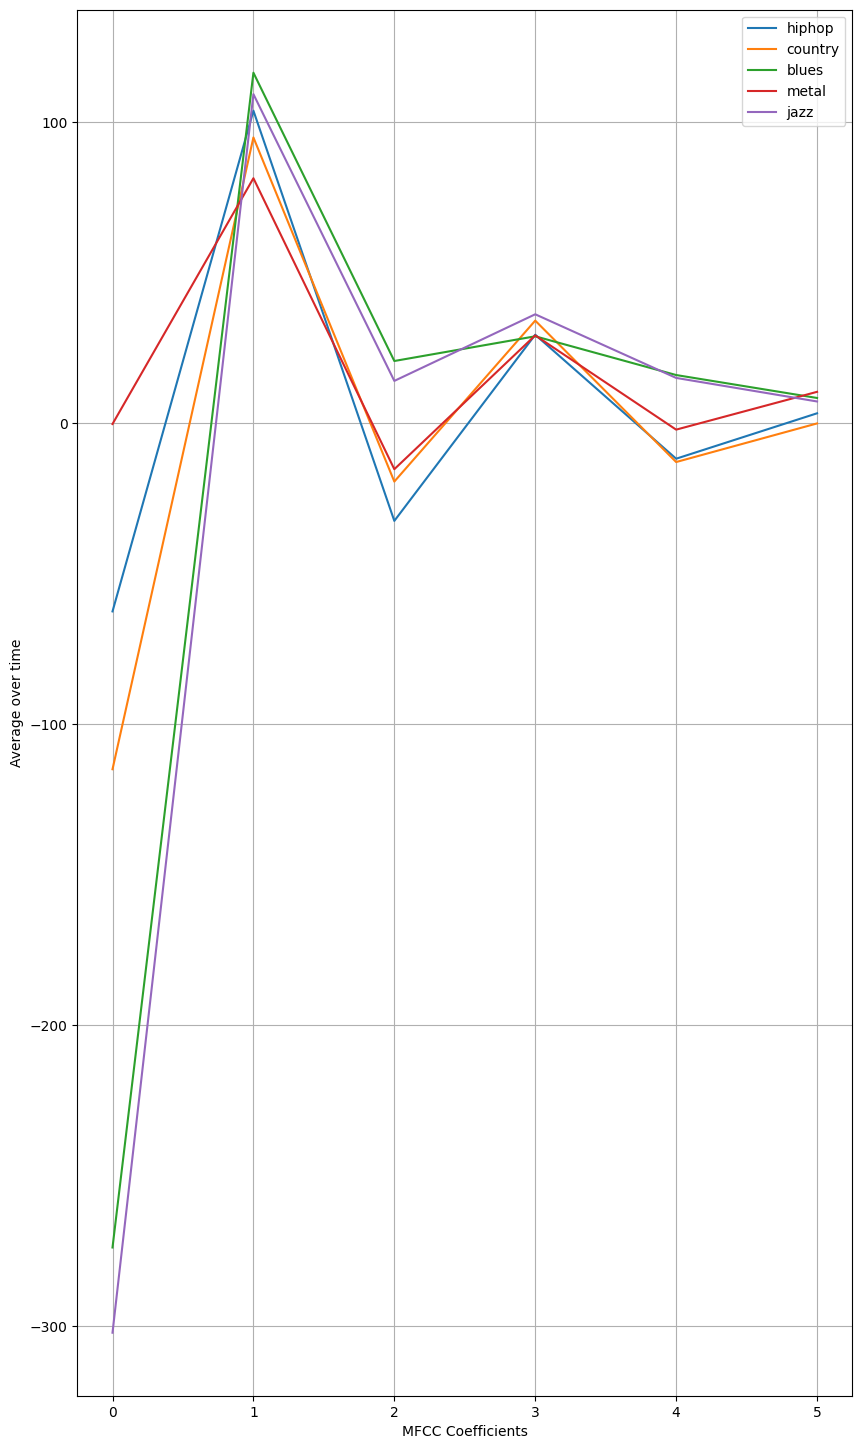

In [ ]:
#Observe the patterns and compare the MFCCs of different genres
y1, sr1 = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/rock/rock.mp3')
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=6)


y2, sr2 = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/country/country.mp3')
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=6)

y3, sr3 = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/blues/blues.mp3')
mfccs3 = librosa.feature.mfcc(y=y3, sr=sr3, n_mfcc=6)

y4, sr4 = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/metal/metal.mp3')
mfccs4 = librosa.feature.mfcc(y=y4, sr=sr4, n_mfcc=6)

y5, sr5 = librosa.load('/content/drive/MyDrive/APS360Data/self_created_music/self_created/jazz/jazz.mp3')
mfccs5 = librosa.feature.mfcc(y=y5, sr=sr5, n_mfcc=6)


mfccs1_mean = np.mean(mfccs1, axis=1)
mfccs2_mean = np.mean(mfccs2, axis=1)
mfccs3_mean = np.mean(mfccs3, axis=1)
mfccs4_mean = np.mean(mfccs4, axis=1)
mfccs5_mean = np.mean(mfccs5, axis=1)

plt.figure(figsize=(10, 18))
plt.plot(mfccs1_mean, label='hiphop')
plt.plot(mfccs2_mean, label='country')
plt.plot(mfccs3_mean, label='blues')
plt.plot(mfccs4_mean, label='metal')
plt.plot(mfccs5_mean, label='jazz')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Average over time')
plt.legend()
plt.grid(True)
plt.show()



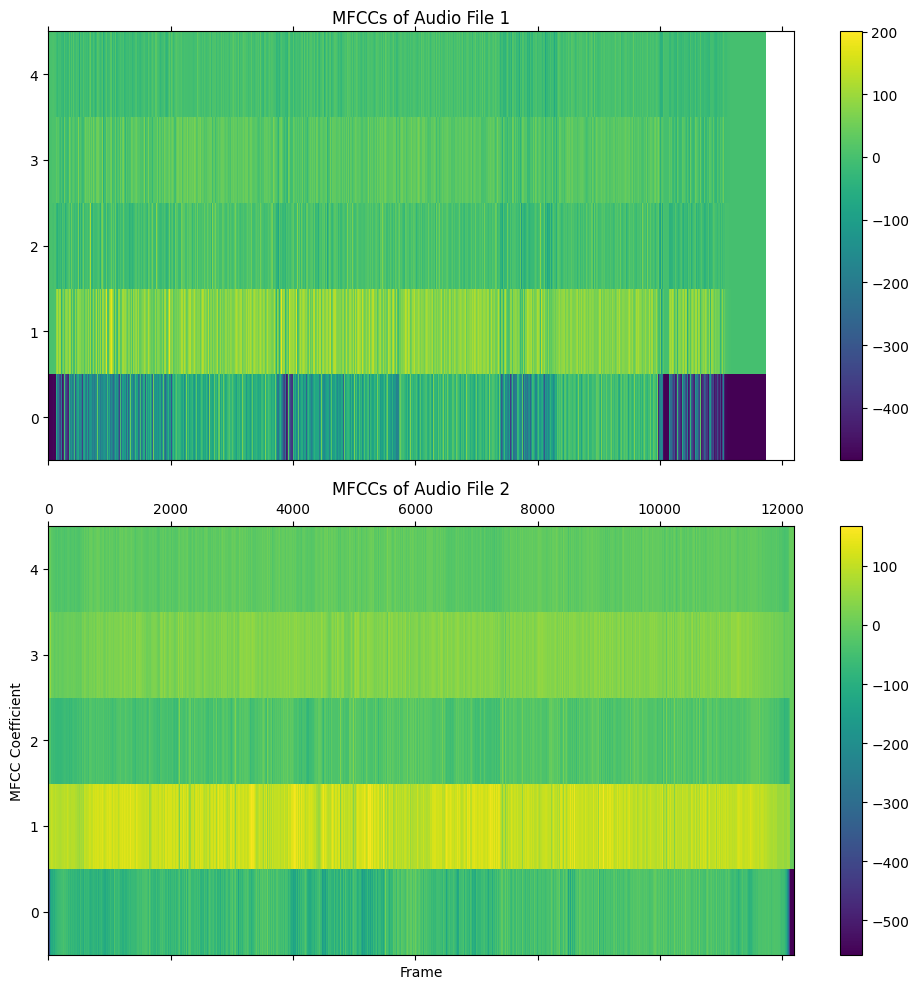

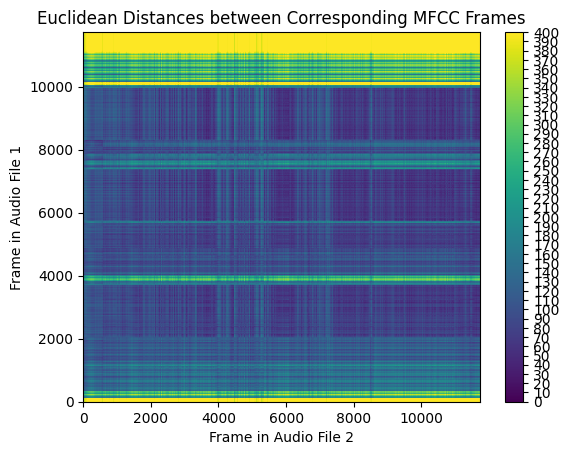

In [ ]:
#Observe how different MFCCs file overlap with each other
file1 = '/content/drive/MyDrive/APS360Data/self_created_music/self_created/pop/pop.mp3'
file2 = '/content/drive/MyDrive/APS360Data/self_created_music/self_created/rock/rock.mp3'
audio1, sr1 = librosa.load(file1)
audio2, sr2 = librosa.load(file2)

mfccs1 = librosa.feature.mfcc(y=audio1, sr=sr1, n_mfcc=5)
mfccs2 = librosa.feature.mfcc(y=audio2, sr=sr2, n_mfcc=5)

fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

cax1 = ax[0].matshow(mfccs1, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(cax1, ax=ax[0])
ax[0].set_title('MFCCs of Audio File 1')

cax2 = ax[1].matshow(mfccs2, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(cax2, ax=ax[1])
ax[1].set_title('MFCCs of Audio File 2')

plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.spatial.distance import cdist

min_length = min(mfccs1.shape[1], mfccs2.shape[1])

mfccs1_trimmed = mfccs1[:, :min_length]
mfccs2_trimmed = mfccs2[:, :min_length]

distances = cdist(mfccs1_trimmed.T, mfccs2_trimmed.T, metric='euclidean')
plt.imshow(distances, aspect='auto', origin='lower', cmap='viridis', vmin=0, vmax=400)
cbar = plt.colorbar()
cbar.locator = ticker.MultipleLocator(base=10)
cbar.update_ticks()

plt.title('Euclidean Distances between Corresponding MFCC Frames')
plt.xlabel('Frame in Audio File 2')
plt.ylabel('Frame in Audio File 1')
plt.show()






In [ ]:
output_shape1 = (20, 1200)

# Create the transform
transform1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
testing_dataset = MFCCDataset(df, transform = transform)
testing_loader = data.DataLoader(testing_dataset, batch_size=1, num_workers=0, shuffle=False, pin_memory = True)

In [ ]:
classify(realmodel,testing_loader)

rock: rock:0.95 pop:0.05 
hiphop: hiphop:0.77 reggae:0.10 classical:0.07 country:0.04 blues:0.01 
classical: classical:0.88 jazz:0.11 pop:0.02 
jazz: jazz:0.86 classical:0.12 country:0.01 
country: rock:0.57 country:0.31 jazz:0.05 hiphop:0.02 classical:0.02 blues:0.02 
pop: hiphop:0.79 pop:0.19 jazz:0.02 
metal: rock:0.79 hiphop:0.17 jazz:0.02 pop:0.02 
disco: rock:0.67 jazz:0.17 pop:0.10 country:0.07 
reggae: reggae:0.80 hiphop:0.11 pop:0.06 jazz:0.03 
blues: country:0.52 jazz:0.22 blues:0.22 pop:0.04 


(           rock  hiphop  classical  jazz  country  pop  metal  disco  reggae  \
 rock        1.0     0.0        0.0   0.0      0.0  0.0    0.0    0.0     0.0   
 hiphop      0.0     1.0        0.0   0.0      0.0  0.0    0.0    0.0     0.0   
 classical   0.0     0.0        1.0   0.0      0.0  0.0    0.0    0.0     0.0   
 jazz        0.0     0.0        0.0   1.0      0.0  0.0    0.0    0.0     0.0   
 country     0.0     0.0        0.0   0.0      1.0  0.0    0.0    0.0     0.0   
 pop         0.0     1.0        0.0   0.0      0.0  0.0    0.0    0.0     0.0   
 metal       1.0     0.0        0.0   0.0      0.0  0.0    0.0    0.0     0.0   
 disco       1.0     0.0        0.0   0.0      0.0  0.0    0.0    0.0     0.0   
 reggae      0.0     0.0        0.0   0.0      0.0  0.0    0.0    0.0     1.0   
 blues       0.0     0.0        0.0   0.0      1.0  0.0    0.0    0.0     0.0   
 
            blues  
 rock         0.0  
 hiphop       0.0  
 classical    0.0  
 jazz         0.0  
 countr